## Goal of this Notebook
1. Calculate weekly and monthly stock movements
2. Vizualize those movements and compare them against each other  
(What is the difference between the daily, weekly, and monthly curves?)

Since we have roughly 250 days of data, we will be using 35 weeks for the weekly movements, and 8 months for the monthly data (we will define a month as 30 days). Having only eight data points for monthly data isn't great but it should suffice for purposes of visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy import stats

In [2]:
def ticker_from_csv(csv_string):
    """ 
    The downloaded files come in the form [ticker].csv. 
    We are just stripping off the csv extension and making the ticker uppercase.
    """
    stock_name = csv_string.rsplit('.', 1)[0] ## Peel off the ".csv" from the given string
    return stock_name.upper()

In [3]:
def get_price_movements(df, period=1):
    """ Get the movement of a stock that's in a data frame. """
    df = df.sort_index(axis=0) ## We want the dates in ascending order
    movement = np.zeros(int(len(df) / period)) ## Python's int function rounds down
    last_price = -1
    count = 0
    for index, row in df.iterrows():
        if (count % period == 0 and count != 0 ):
            i = int((count / period) - 1)
            movement[i] = 100 * row['close'] / last_price - 100
            last_price = row['close']
        elif (count == 0):
            last_price = row['close']
        count += 1
    
    return movement

In [4]:
def plot_gaussian(x, x_min=-10, x_max=10, n=10000, fill=False):
    """
    Expects an np array of movement percentages, 
    plots the gaussian kernel density estimate
    """
    ## Learn the kernel-density estimate from the data
    density = stats.gaussian_kde(x)
    
    ## Evaluate the output on some data points
    xs = np.linspace(x_min, x_max, n)
    y = density.evaluate(xs)
    
    ## Create the plot
    plt.plot(xs, y)
    plt.xlabel('Daily Movement Percentage')
    plt.ylabel('Density')
    
    if (fill):
        plt.fill_between(xs, 0, y)

In [5]:
def plot_gaussian_categorical(x, x_min=-10, x_max=10, n=10000, title=''):
    ''' 
    Expects an np array of movement percentages, 
    plots the gaussian kernel density estimate
    '''
    ## Learn the kernel-density estimate from the data
    density = stats.gaussian_kde(x)
    
    ## Evaluate the output on some data points
    xs = np.linspace(x_min, x_max, n)
    y = density.evaluate(xs)
    
    ## Create the plot
    plt.plot(xs, y)
    plt.xlabel('Movement Percentage')
    plt.ylabel('Density')
    
    ## Get stats
    mu, sigma = np.mean(x), np.std(x)
 
    ## Plot with conditionals
    plt.fill_between(xs, 0, y, where= xs < mu, facecolor='#eeeedd', interpolate=True) ## Modest Drop
    plt.fill_between(xs, 0, y, where= xs < (mu - sigma / 2), facecolor='yellow', interpolate=True) ## Drop
    plt.fill_between(xs, 0, y, where= xs < (mu - sigma), facecolor='orange', interpolate=True) ## Big Drop
    plt.fill_between(xs, 0, y, where= xs < (mu - 2*sigma), facecolor='red', interpolate=True) ## Very big drop
    
    plt.fill_between(xs, 0, y, where= xs > mu, facecolor='#ebfaeb', interpolate=True) ## Modest Gain
    plt.fill_between(xs, 0, y, where= xs > (mu + sigma/2), facecolor='#b5fbb6', interpolate=True) ## Gain
    plt.fill_between(xs, 0, y, where= xs > (mu + sigma), facecolor='#6efa70', interpolate=True) ## Big Gain
    plt.fill_between(xs, 0, y, where= xs > (mu + 2*sigma), facecolor='green', interpolate=True) ## Very Big Gain
    
    ## Label mu and sigma
    plt.text(x_min + 1, max(y) * 0.8, r'$\mu$ = ' + '{0:.2f}'.format(mu))
    plt.text(x_min + 1, max(y) * 0.9, r'$\sigma$ = ' + '{0:.2f}'.format(sigma))
    ## Set title if given
    if (len(title) != 0):
        plt.title(title)

### Compare daily, weekly, and monthly movements for TSLA

In [6]:
df = pd.DataFrame()
df = df.from_csv('tsla.csv')

In [7]:
## Get movement data
movement = get_price_movements(df)
weekly_movement = get_price_movements(df, period=7)
monthly_movement = get_price_movements(df, period=30)

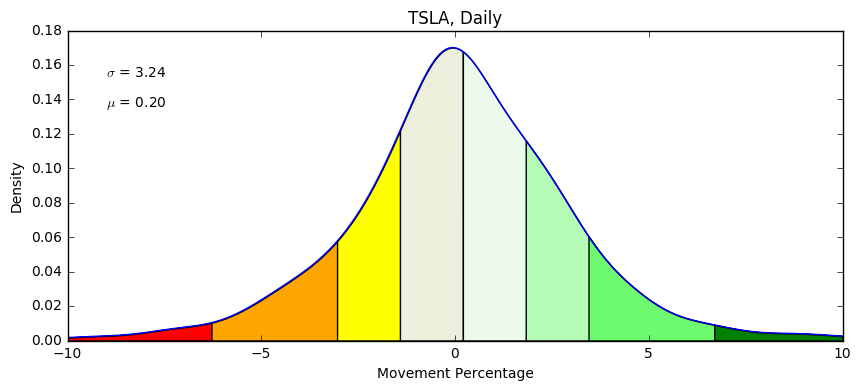

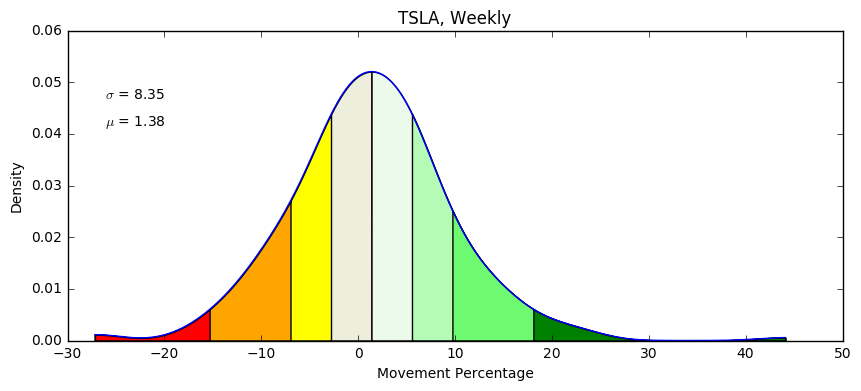

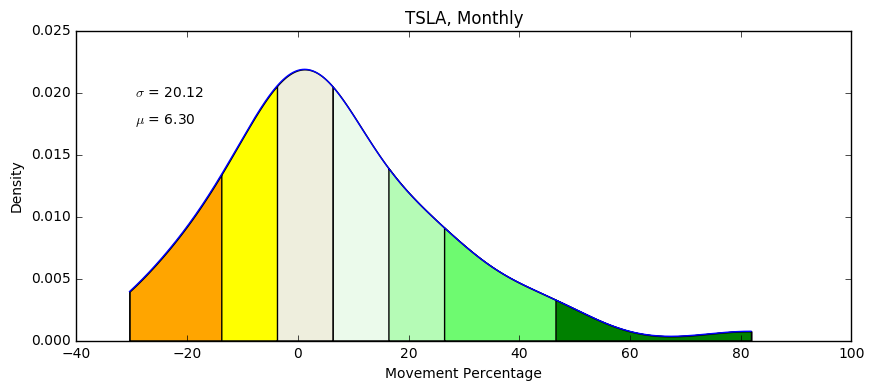

In [8]:
plt.figure(figsize=(10,4))
plot_gaussian_categorical(movement, title='TSLA, Daily')
plt.figure(figsize=(10,4))
plot_gaussian_categorical(weekly_movement, title='TSLA, Weekly', x_min = min(weekly_movement), x_max= max(weekly_movement))
plt.figure(figsize=(10,4))
plot_gaussian_categorical(monthly_movement, title='TSLA, Monthly', x_min = min(monthly_movement), x_max= max(monthly_movement))
plt.show()

### Repeat this process with a few other stocks

In [9]:
g = glob.glob('*.csv')

In [10]:
g

['amd.csv',
 'bac.csv',
 'fb.csv',
 'goog.csv',
 'intc.csv',
 'nke.csv',
 'nvda.csv',
 'sbux.csv',
 'spy.csv',
 'tsla.csv']

In [11]:
periods = [1, 7, 30]
for i in range(len(g)):
    df = pd.DataFrame()
    df = df.from_csv(g[i])
    for t in periods:
        plt.figure(figsize=(10,4))
        movement = get_price_movements(df, period=t)
        ticker = ticker_from_csv(g[i])
        ticker_period = ticker + ', ' + str(t)
        plot_gaussian_categorical(movement, title=ticker_period, x_min = min(movement), x_max= max(movement))
        

//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


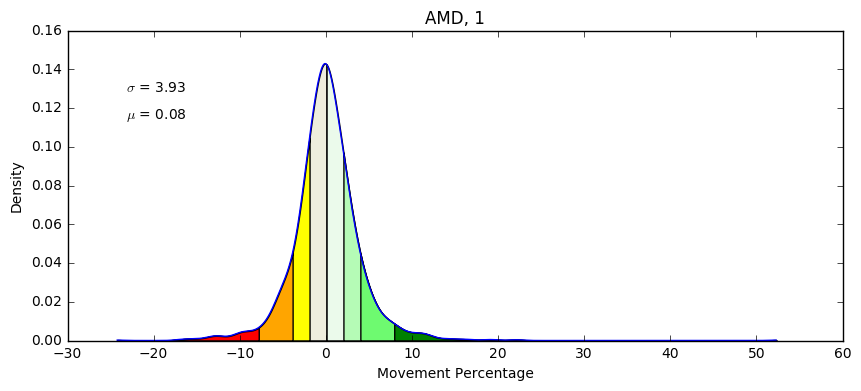

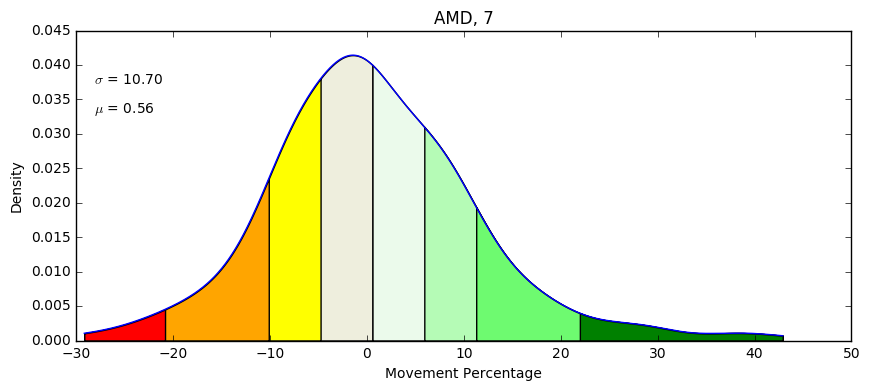

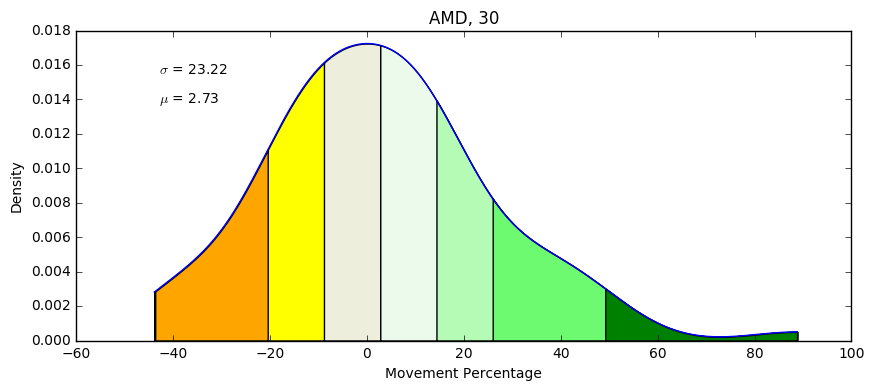

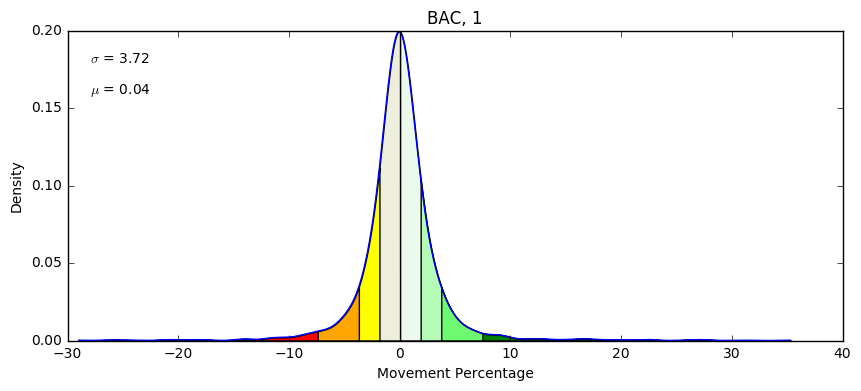

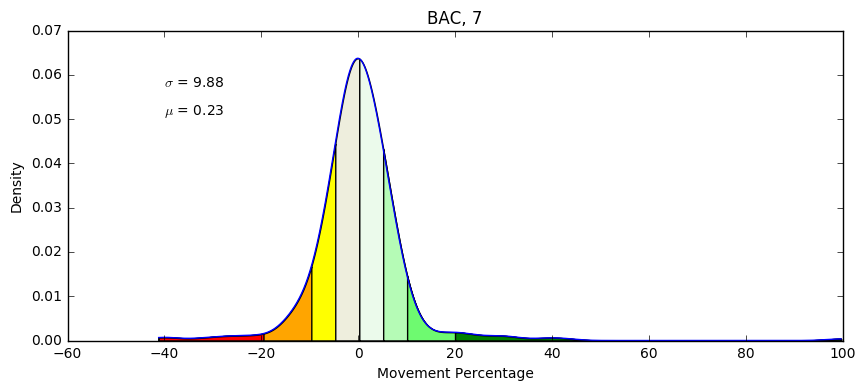

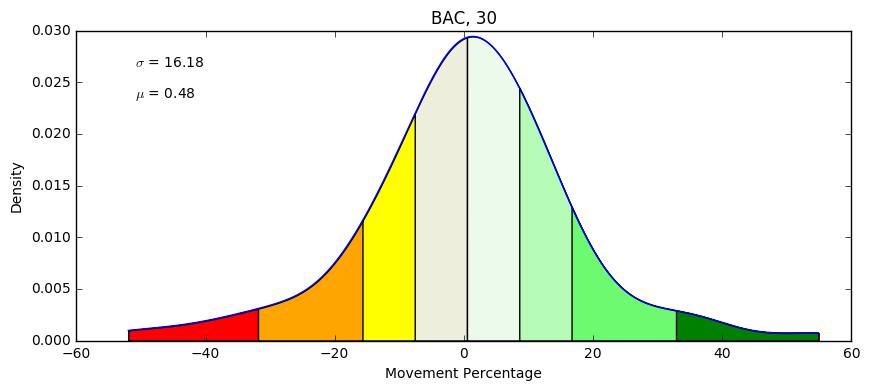

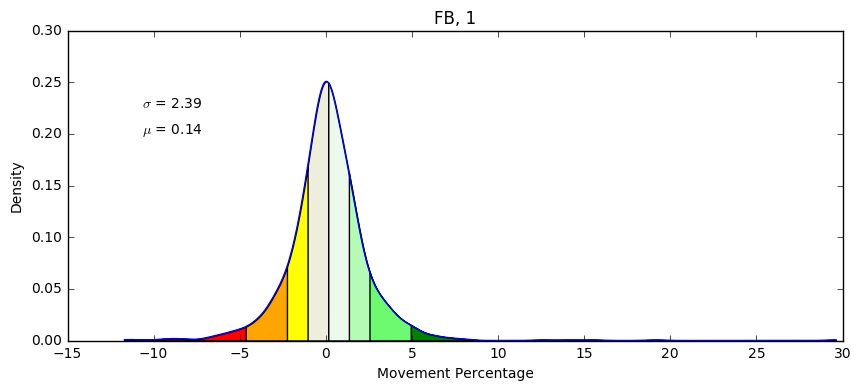

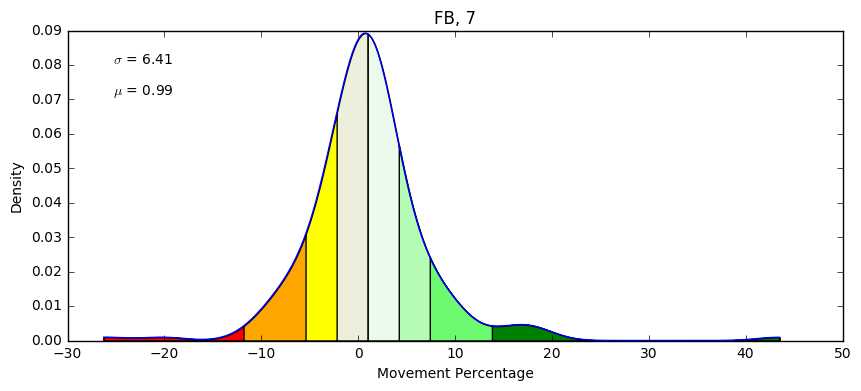

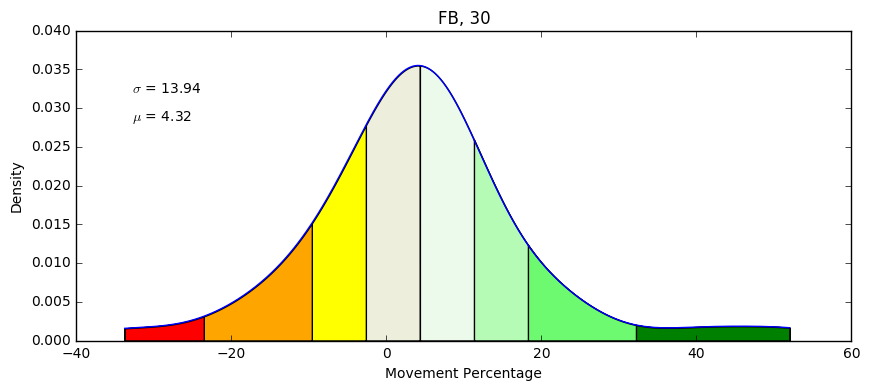

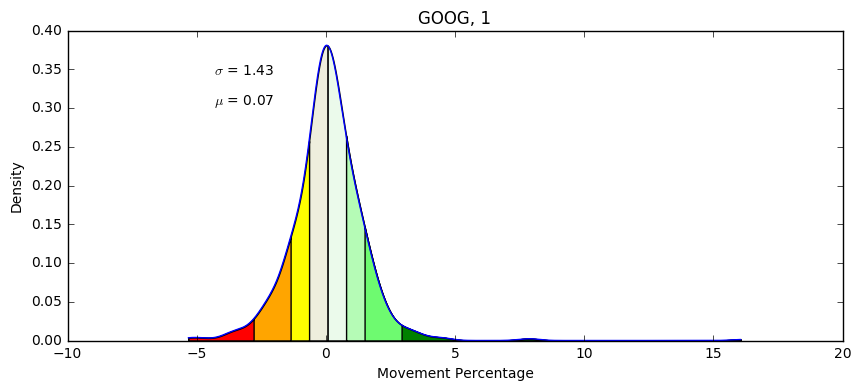

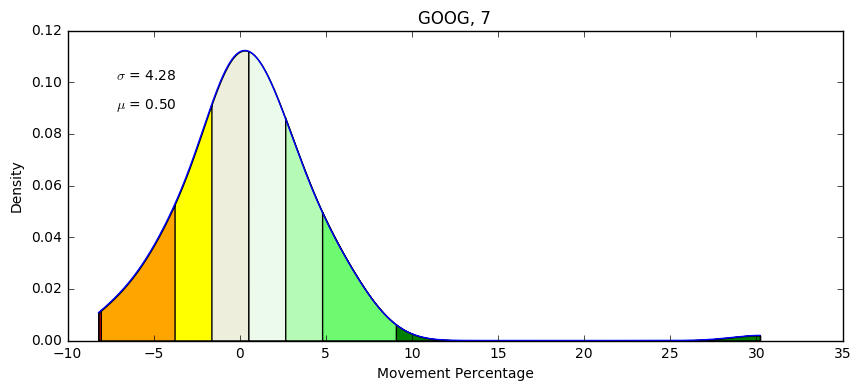

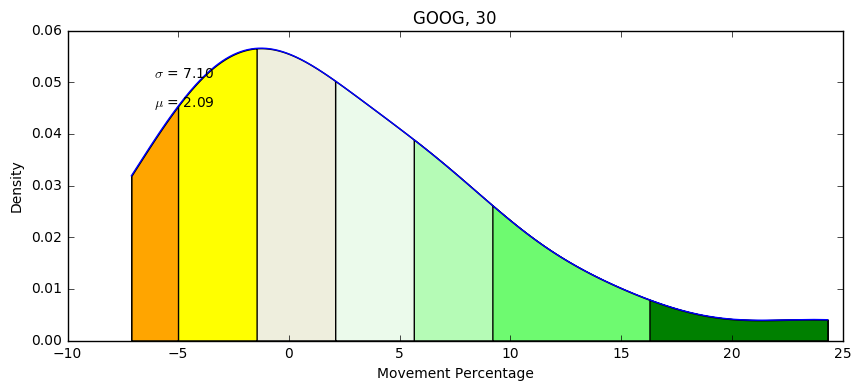

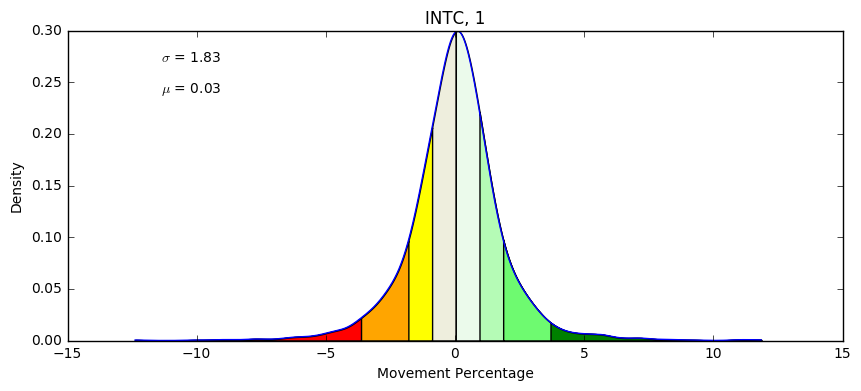

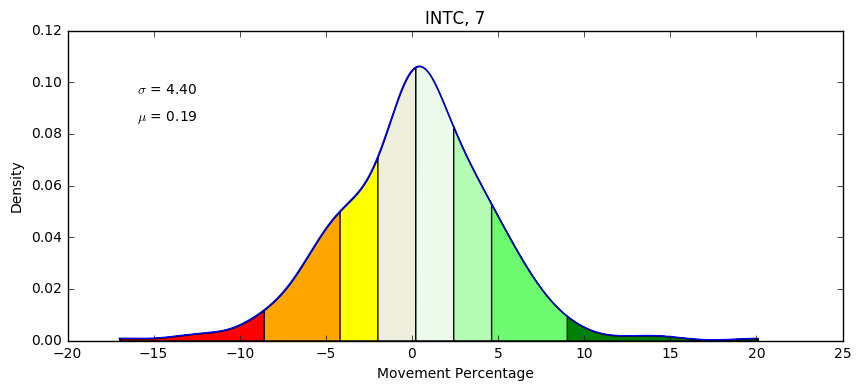

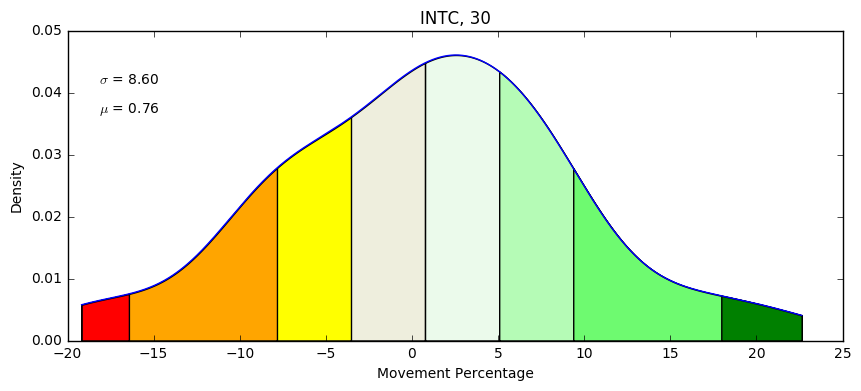

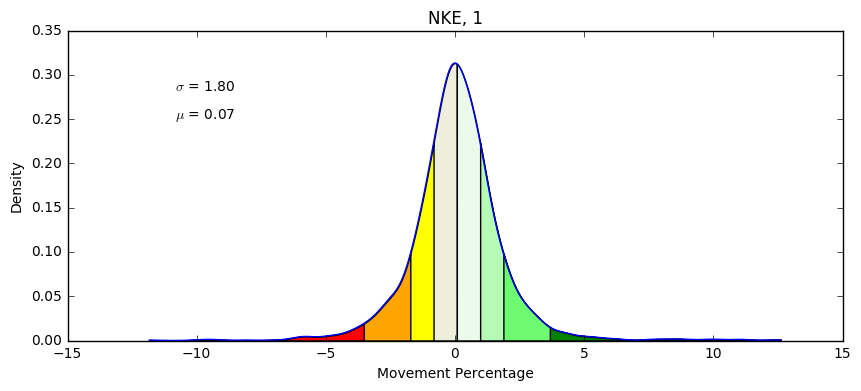

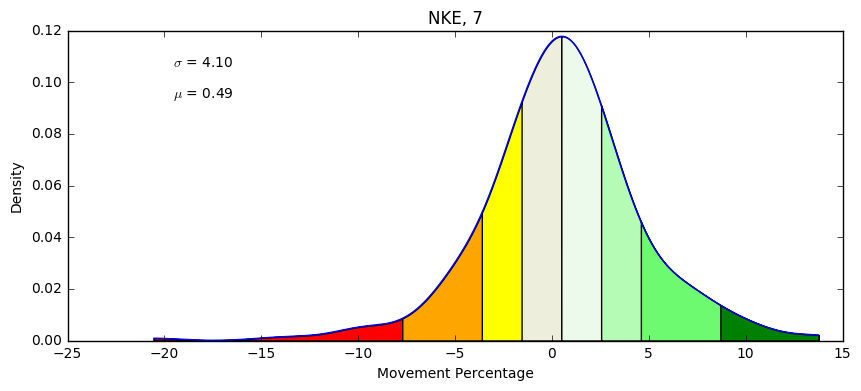

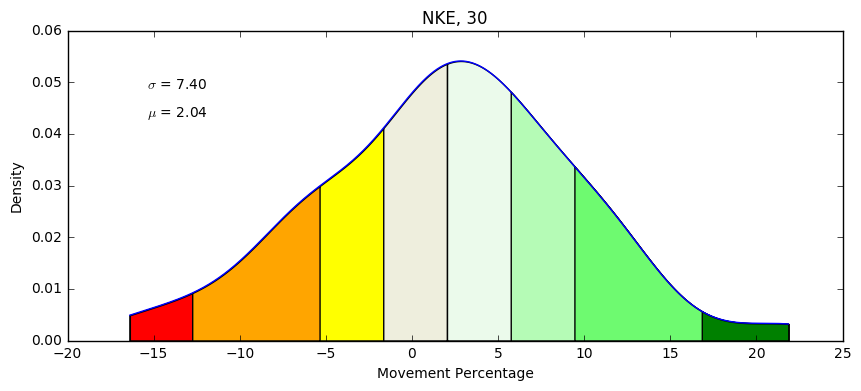

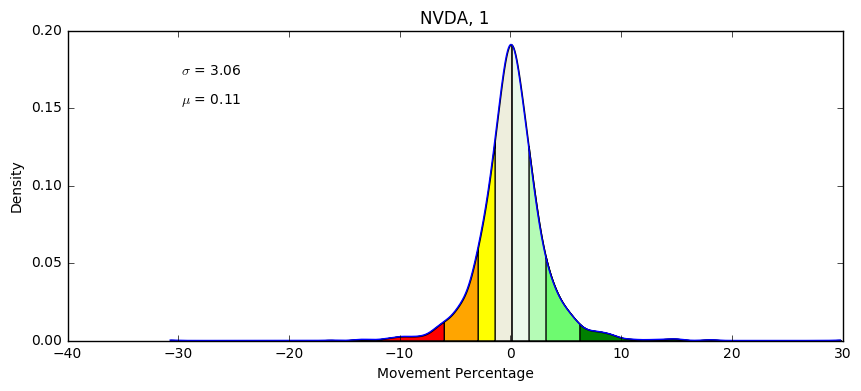

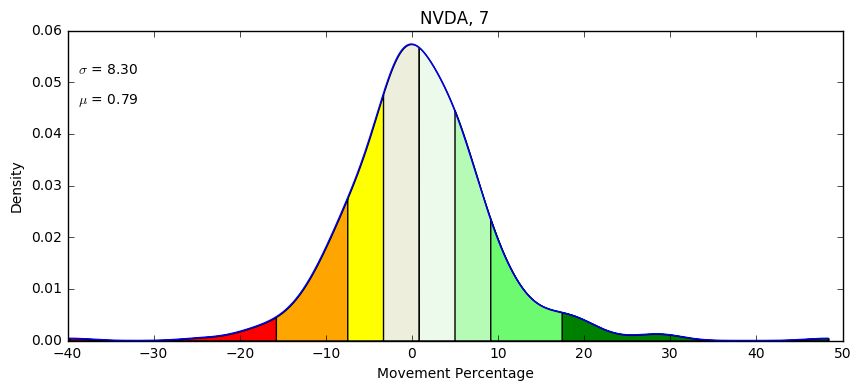

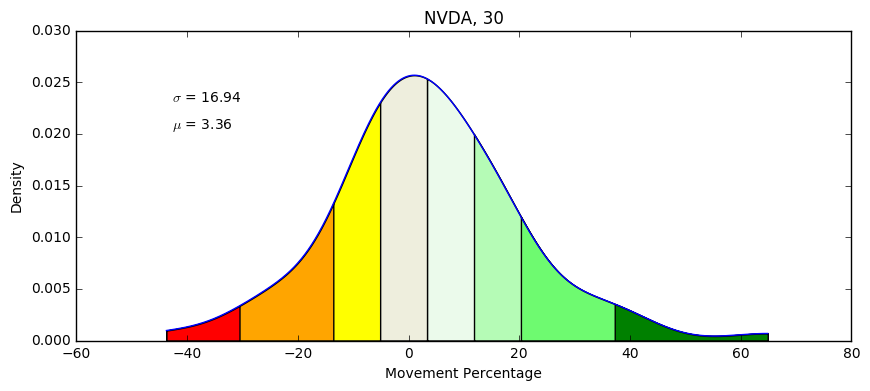

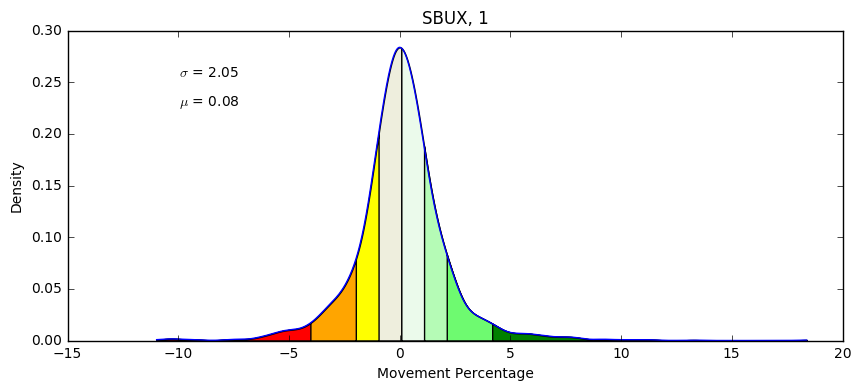

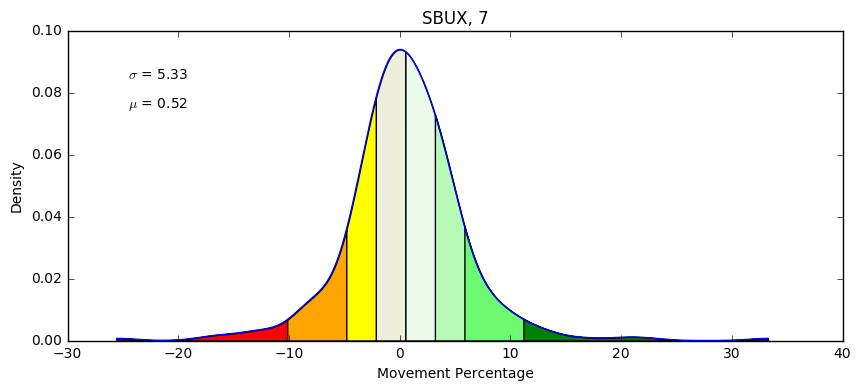

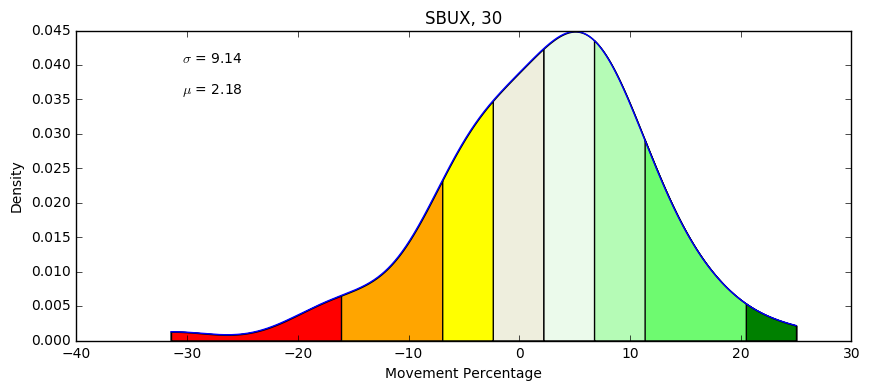

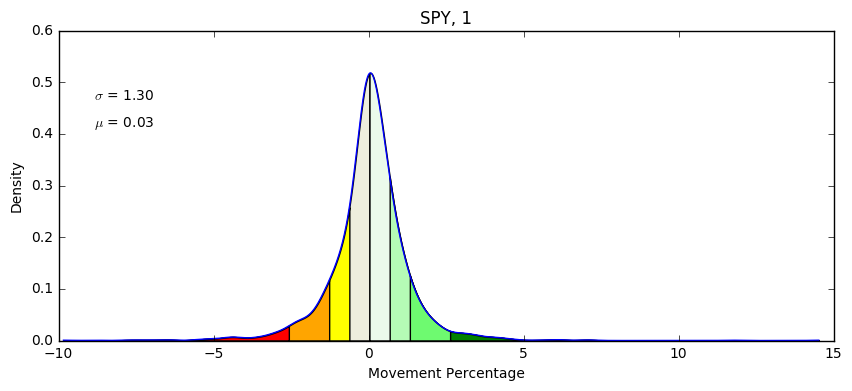

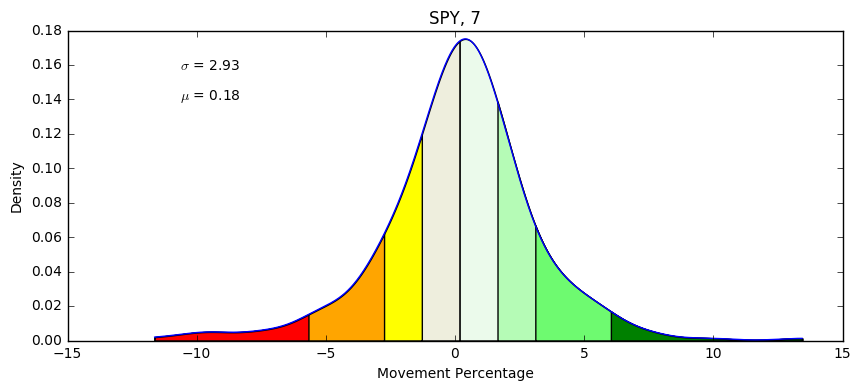

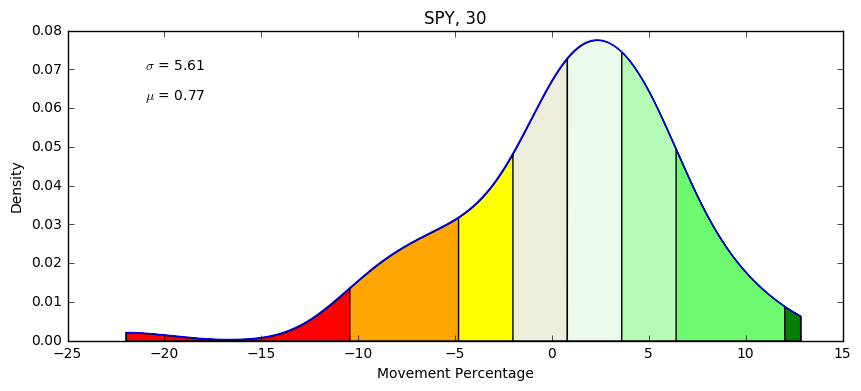

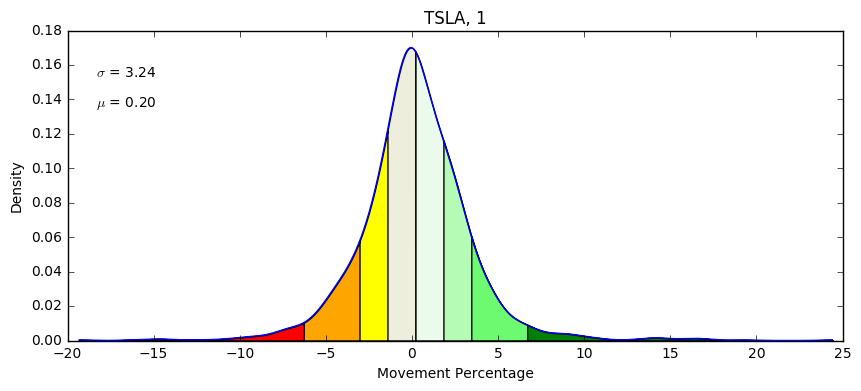

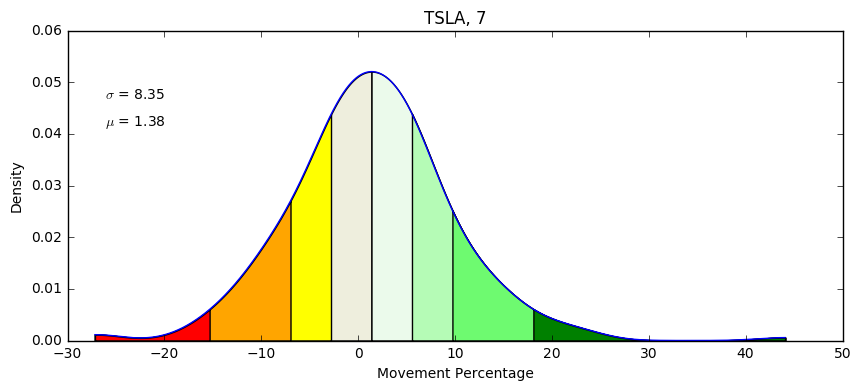

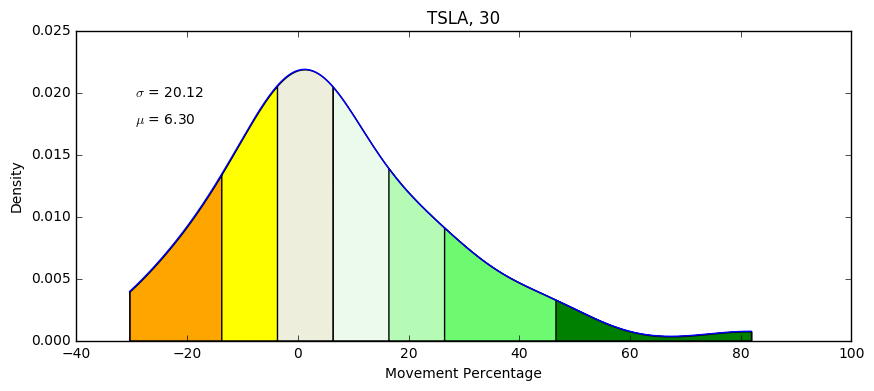

In [12]:
plt.show()